In [1]:
#impor library numpy and pandas
import numpy as np
import pandas as pd
#menyimpan data dalam variabel df
df=pd.read_csv('C:/Users/Administrator/H8_KS03/dataset/london_crime_by_lsoa.csv')
#melihat 5 baris pertama data
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [2]:
#melihat dimesnsi data
df.shape

(13490604, 7)

In [3]:
#mengecek apakah terdapat missing value pada setiap kolom
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [4]:
#melihat deskripsi statistik
df.describe()


,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [5]:
#mengurutkan data berdasarkan tahun dan bulan kejadian dan menyimpannya dalam variabel df_lon
df_lon=df.sort_values(by=['year','month'], ascending=[True,True])
#membuang kolom lsoa_code 
df_lon.drop(columns='lsoa_code', inplace=True)
#mereset index
df_lon.reset_index(drop=True, inplace=True)
df_lon.head()


,borough,major_category,minor_category,value,year,month
0,Havering,Violence Against the Person,Harassment,0,2008,1
1,Hounslow,Other Notifiable Offences,Going Equipped,0,2008,1
2,Sutton,Robbery,Personal Property,1,2008,1
3,Lewisham,Other Notifiable Offences,Going Equipped,0,2008,1
4,Hammersmith and Fulham,Criminal Damage,Criminal Damage To Dwelling,0,2008,1


In [6]:
df_lon.shape

(13490604, 6)

In [7]:
#membuat dataframe baru berdasarkan jumlah kejahatan setiap tahunnya
lon_crime=df_lon.groupby(['borough','year'])['value'].sum()
df_lon_crime=pd.DataFrame({'value':lon_crime})
#merest index data frame
df_lon_crime.reset_index(inplace=True)
df_lon_crime

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990
...,...,...,...
292,Westminster,2012,59226
293,Westminster,2013,53852
294,Westminster,2014,47564
295,Westminster,2015,47395


In [8]:
#membuat dataframe
#berdasarkan jumlah kejahatan pada setiap daerah pertahunnya
df_lon_crime_byBorough=pd.DataFrame({'borough':df_lon_crime['borough'].unique()})
for year in df_lon_crime['year'].unique():
    df_lon_crime_byBorough[year]=list(df_lon_crime.loc[df_lon_crime['year']==year,'value'])
df_lon_crime_byBorough.head()

,borough,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
1,Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
2,Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
3,Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
4,Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [9]:
#menambahkan kolom total
df_lon_crime_byBorough['Total']=df_lon_crime_byBorough.sum(axis=1)
df_lon_crime_byBorough.head()


,borough,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
0,Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
1,Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
2,Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
3,Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
4,Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [10]:
#mengambil data 5 daerah dengan total kasus terbanyak
df_lon_crime_top5=df_lon_crime_byBorough.sort_values(by='Total',ascending=False).head(5)
#reset index
df_lon_crime_top5.reset_index(drop=True, inplace=True)

In [11]:
#mengatur borough menjadi index
df_lon_crime_top5.set_index('borough',drop=True,inplace=True)
df_lon_crime_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [12]:
#membuang kolom total pada df_lon_crime_top5
df_lon_crime_top5.drop(columns='Total', inplace=True)
df_lon_crime_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


In [13]:
#mengimpor matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['seaborn-whitegrid'])

# Area Plot London Crime Top 5

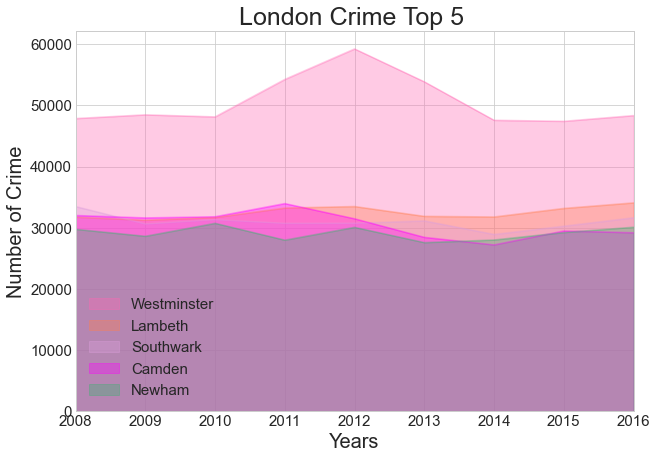

In [14]:
#transpose dataframe
df_lon_crime_top5_t=df_lon_crime_top5.transpose()
#membuat area plot dari 5 daerah dengan kejahatan tertinggi
df_lon_crime_top5_t.plot(kind='area',
                         stacked=False,
                         alpha=0.35,
                        figsize=(10,7),
                        color=['hotpink','coral','plum',
                              'magenta','mediumseagreen'],
                        xlim=(2008,2016))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('London Crime Top 5 ', fontdict={'size':25})
plt.xlabel('Years', fontsize=20)
plt.ylabel('Number of Crime',fontsize=20)
plt.legend(fontsize=15)

Dari grafik tersebut terlihat bahwa kasus kejahatan pada westminster mendominasi setiap tahunnya, sedangkan kasus kejahatan di Lambetth, Southwark, Camden, dan Newham memilki tren yang serupa, dimana kejahatan +- berada pada angka 30.000 kasus setiap tahunnya.

Disamping itu, pada tahun 2012 Westminister mengalami peningkatan kasus yang cukup tinggi sehingga perlu diteliti lebih lanjut mengenai peristiwa yang terjadi pada tahun tersebut.

In [15]:
df_westminster_2013=df_lon.loc[((df_lon['year']==2013)&(df_lon['borough']=='Westminster'))]
df_westminster_2013_cat=pd.DataFrame({'value':df_westminster_2013.groupby('major_category')['value'].sum()})
df_westminster_2013_cat

,value
major_category,
Burglary,3906
Criminal Damage,2080
Drugs,4151
Fraud or Forgery,0
Other Notifiable Offences,762
Robbery,2198
Sexual Offences,0
Theft and Handling,33868
Violence Against the Person,6887


In [16]:
df_westminster_2013=df_lon.loc[((df_lon['year']==2013)&(df_lon['borough']=='Westminster'))]
df_westminster_2013_minor=df_westminster_2013.loc[df_westminster_2013['major_category']=='Theft and Handling']
df_westminster_2013_minor=pd.DataFrame({'value':df_westminster_2013_minor.groupby('minor_category')['value'].sum()})
df_westminster_2013_minor

,value
minor_category,
Handling Stolen Goods,91
Motor Vehicle Interference & Tampering,149
Other Theft,16620
Other Theft Person,8404
Theft From Motor Vehicle,2706
Theft From Shops,3945
Theft/Taking Of Motor Vehicle,642
Theft/Taking of Pedal Cycle,1311


# Pie Chart dan Bar Chart Westminster Crime 2013

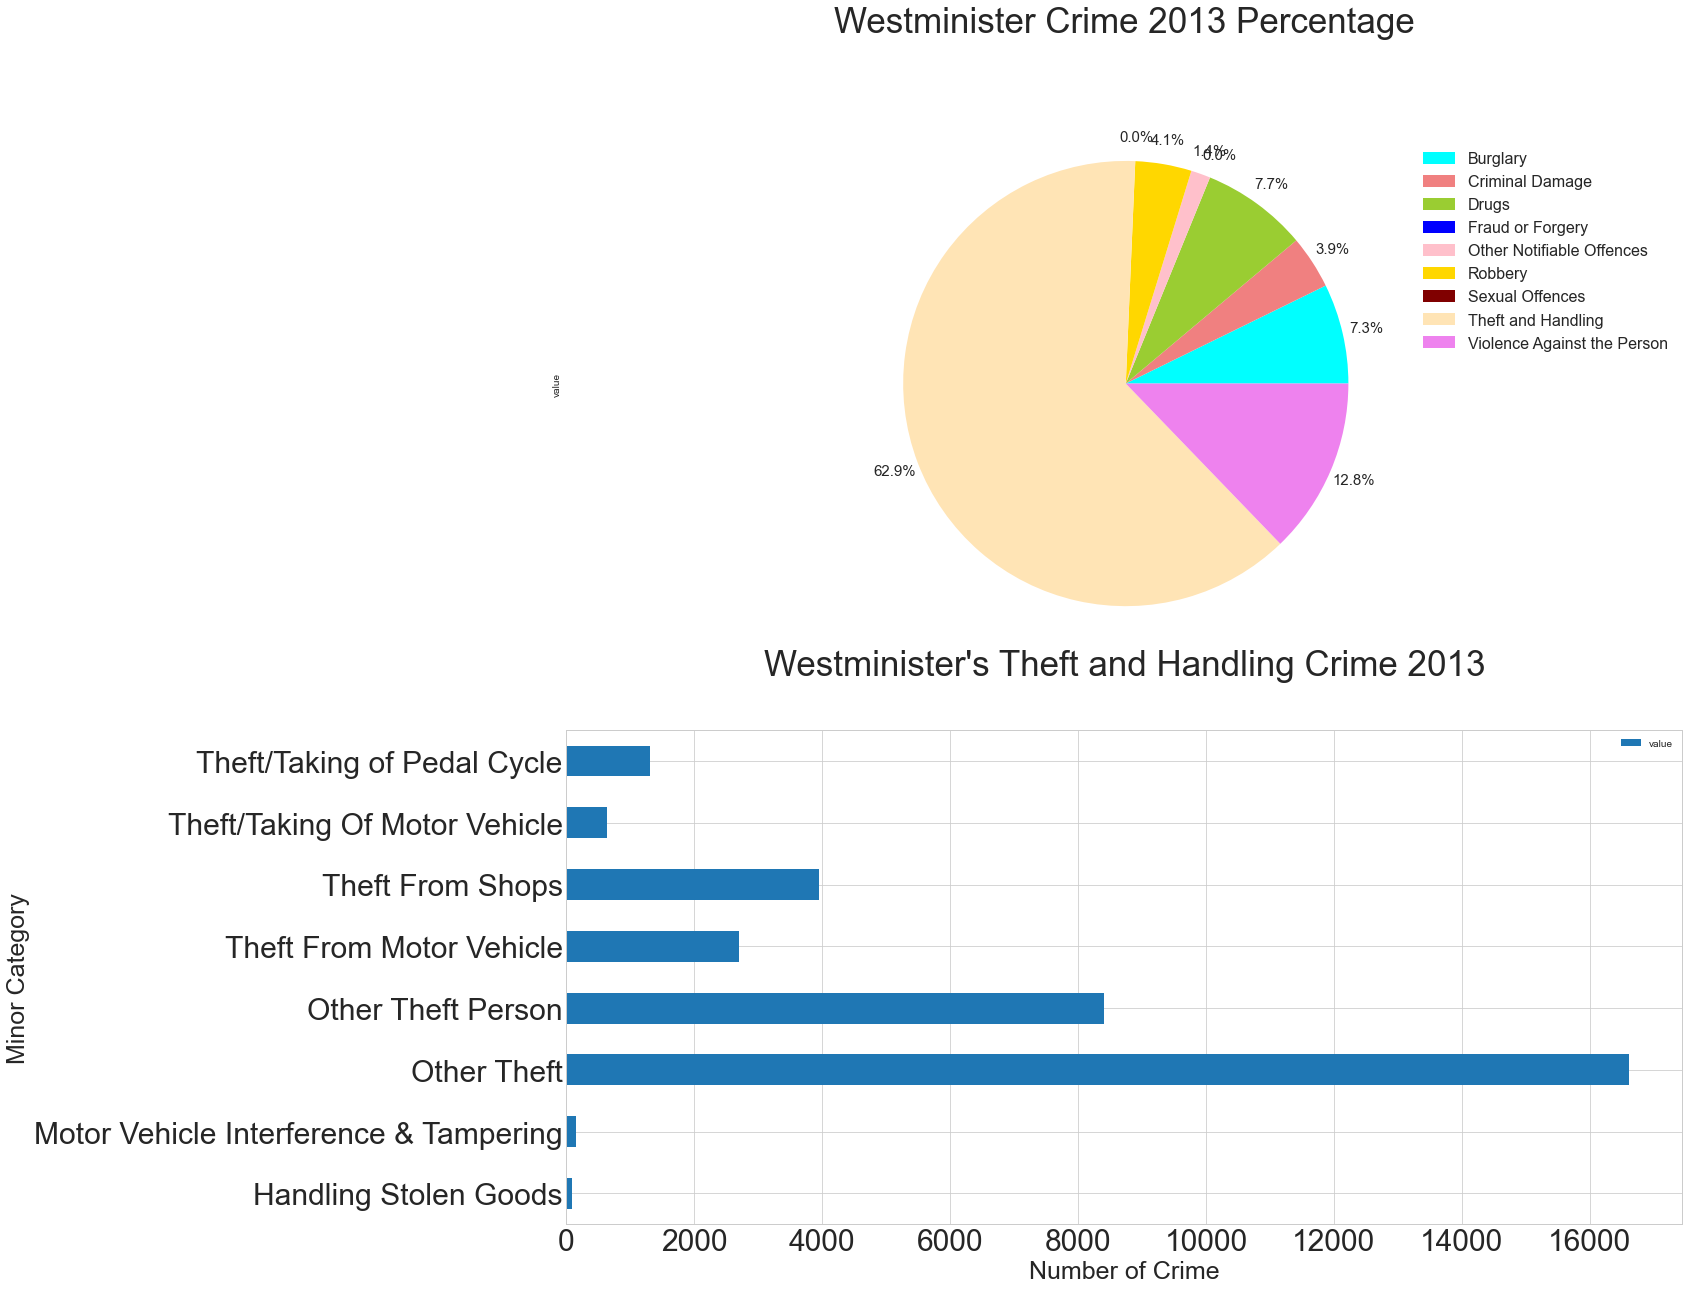

In [17]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
color_list=['aqua','lightcoral','yellowgreen',
           'blue','pink','gold',
            'maroon','moccasin','violet']
df_westminster_2013_cat['value'].plot(kind='pie',
                             colors=color_list,
                             figsize=(20,20),
                             autopct='%1.1f%%',
                             pctdistance=1.11,
                             labels=None,
                             fontsize=15,
                                     ax=ax1)
df_westminster_2013_minor.plot(kind='barh', ax=ax2,
                              fontsize=30)
ax1.set_title('Westminister Crime 2013 Percentage',
          x=0.5,y=1.2,
          fontsize=35)
ax1.axis('equal')
ax1.legend(labels=df_westminster_2013_cat.index,
           fontsize=16)
ax2.set_title("Westminister's Theft and Handling Crime 2013",
          x=0.5,y=1.1,
          fontsize=35)
ax2.set_xlabel('Number of Crime', fontsize=25)
ax2.set_ylabel('Minor Category', fontsize=25)
plt.show()

Kasus kejahatan di westminster didominasi oleh theft and handling dengan persentase sebesar 62.9%, kasus theft&handling terjadi dengan berbagai macam bentuk kejahatan seperti pencurian sepeda motor,pencurian dari kendaraan bermotor,  pencurian pada toko, dan berbagai bentuk lain yang tampak pada bar chart. 

# Histogram of London Crime

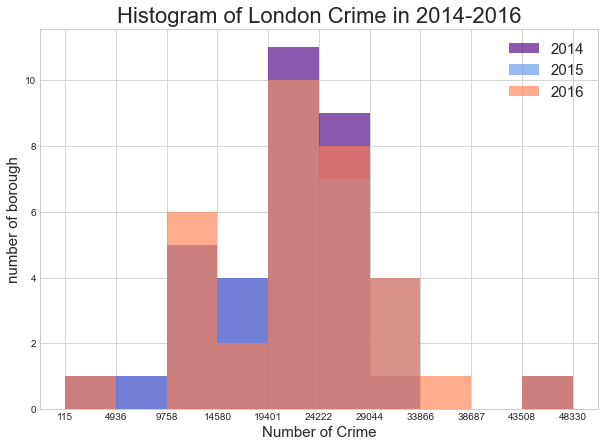

In [18]:
#menentukan jarak untuk xticks dan yticks
count, bin_edges=np.histogram(df_lon_crime_byBorough.loc[:,2014:2016])
#histogram jumlah kejahatan di london pada tahun 2014-2016
df_lon_crime_byBorough.loc[:,2014:2016].plot(kind='hist',
                                               figsize=(10,7),
                                               color=['indigo',
                                                     'cornflowerblue',
                                                     'coral'],
                                            xticks=bin_edges,
                                            alpha=0.65,
                                            stacked=False,
                                            bins=10)
plt.title('Histogram of London Crime in 2014-2016', fontsize=22)
plt.xlabel('Number of Crime', fontsize=15)
plt.ylabel('number of borough' ,fontsize=15)
plt.legend(fontsize=15)

Dari histogram tersebut dapat terlihat bahwa kejahatan di london dari tahun 2014-2016 seringkali terjadi sebanyak 19401 hingga 29044 kasus yang terjadi di lebih dari 8 wilayah London setiap tahunnya

In [19]:
#mengambil data total kejahatan di London setiap tahunnya 
#menghapus kolom total
totalperYear=pd.DataFrame({'Total':df_lon_crime_byBorough.sum()})
#membuang baris 'borough' dan 'total keseluruhan'
totalperYear.drop(['borough','Total'], axis=0, inplace=True)
#reset index
totalperYear.reset_index( inplace=True)
#mengganti nama kolom 
totalperYear.rename(columns={'index':'year'}, inplace=True)
#mengatur kolom year menjadi index
totalperYear.set_index('year',drop=True,inplace=True)
totalperYear

,Total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


# Bar Chart Total Crime in London

Text(0.5, 1.0, 'Total Crime in London 2008-2016')

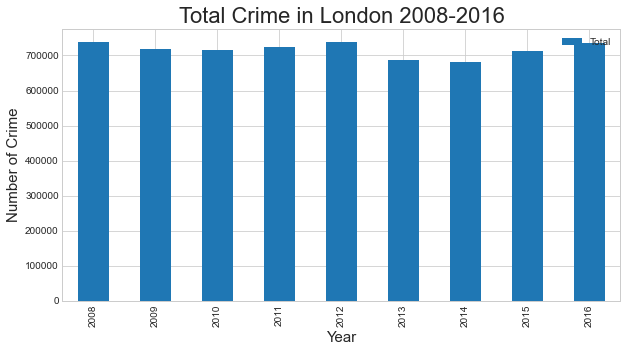

In [20]:
#Barchart banyaknya kasus kejahatan di London 2008-106
totalperYear.plot(kind='bar', figsize=(10,5))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Crime', fontsize=15)
plt.title('Total Crime in London 2008-2016', fontsize=22)


Dari bar char tersebut terlihat bahwa total kasus kejahatan dari tahun 2008 hingga 2016 setiap tahunnya hampir selalu berkisar diangka  700 ribu kasus keatas, kecuali ditahun 2013 dan 2014 yang sempat turun dibawah angka 700 ribu

In [21]:
#mengambil data jumlah kejahatan berdasarkan kategori kejahatan
df_lon_crime_byCategory= pd.DataFrame({'value':df_lon.groupby(['major_category'])['value'].sum()})
df_lon_crime_byCategory

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


# Pie Chart Persentase Kategori Kejahatan London

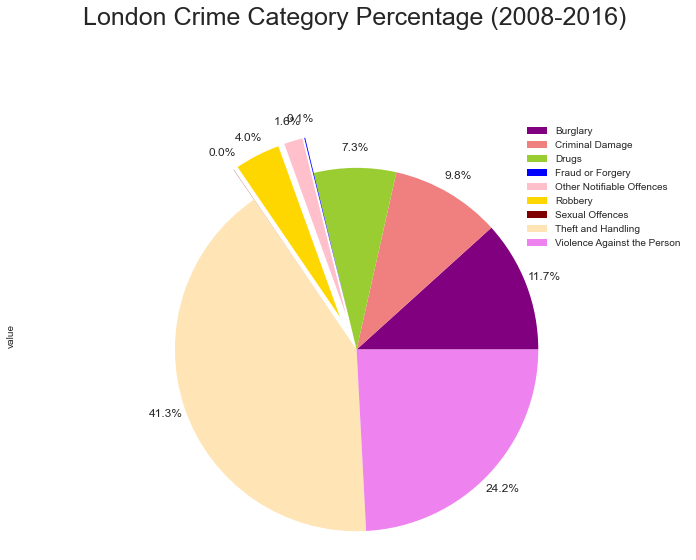

In [22]:
#membuat pie chart berdasarkan total kejahatan di London tahun 2008-2016
#pada masing-masing category
color_list=['purple','lightcoral','yellowgreen',
           'blue','pink','gold',
            'maroon','moccasin','violet']
explode_list=[0,0,0,0.2,0.2,0.2,0.2,0,0]
df_lon_crime_byCategory['value'].plot(kind='pie',
                                     colors=color_list,
                                     explode=explode_list,
                                     figsize=(12,8),
                                     autopct='%1.1f%%',
                                     pctdistance=1.11,
                                     labels=None,
                                     fontsize=12)
plt.title('London Crime Category Percentage (2008-2016)',
          x=0.5,y=1.2,
          fontsize=25)
plt.axis('equal')
plt.legend(labels=df_lon_crime_byCategory.index,
           fontsize=10)


Dari pie chart tersebut dapat disimpulkan bahwa theft and handling menjadi kasus yang paling sering terjadi selama tahun 2008-2016 dengan persentase sebesar 41.3% dari keseluruhan kasus, kemudian disusul dengan kasus violence against the person yang menyumbang 25% dari total kasus.

Adapun kasus yang paling jarang terjadi adalah sexual offences yang hampir kurang dari 0.1%, kemudian kasus kejahatan fraud and forgery dengan persentase sebesar 0.1%

In [23]:
#melihat sebaran data wilayah Lambetth, Southwark, Camden, dan Newham
#memnyimpan data ke empat wilayah tersebut
df_LSCN=df_lon_crime_top5_t.drop(columns='Westminster')
#melihat deskripsi statistik
df_LSCN.describe()

borough,Lambeth,Southwark,Camden,Newham
count,9.000000,9.000000,9.000000,9.000000
mean,32464.222222,30978.777778,30571.888889,29113.777778
std,1014.515005,1215.293049,2121.547633,1119.162385
min,31225.000000,28912.000000,27198.000000,27577.000000
25%,31717.000000,30623.000000,29183.000000,28005.000000
50%,31868.000000,30737.000000,31472.000000,29217.000000
75%,33224.000000,31320.000000,31804.000000,30067.000000
max,34071.000000,33470.000000,33956.000000,30728.000000


# Box Plot Kasus Kejahatan di Lambeth, Southwark, Camden, Newham

Text(0, 0.5, 'Number of Crime')

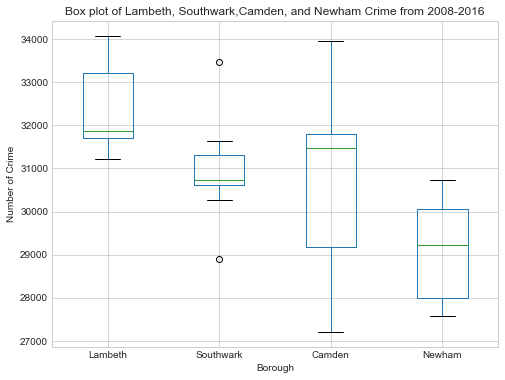

In [24]:
#membandingkan distribusi sebaran kasus kejahatan di Lambeth, Southwark,Camden, dan Newham dengan boxplot
df_LSCN.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Lambeth, Southwark,Camden, and Newham Crime from 2008-2016')
plt.xlabel('Borough')
plt.ylabel('Number of Crime')

dari boxplot tersebut dapat dilihat bahwa, walaupun secara garis besar angka kejahatan rata-rata berkisar di angka 30 ribu kasus, keempatnnya memiliki sebaran yang berbeda.

Jumlah kasus kejahatan pada Camden lebih bervariasi dibanding keempat wilayah lainnya, wilayah Newham sebarannya jumlah kasusnya lebih merata, Southwark memiliki data pencilan. Jika mengacu kembali pada tabel data pada tahun 2008 Southwark mencatakan kasus kejahatan sebanyak 33.470 yang selisihnya cukup besar dengan kasus pada tahun-tahun setelahnya. Begitu juga pada tahun 2014 Southwark mencatatkan kasus terendahnya selama rentang waktu 2008-2016 dengan selisih yang juga cukup besar. Sehingga kedua data tersebut dianggap sebagai pencilan.

In [25]:
df_cat_year=pd.DataFrame({'value':df_lon.groupby(['major_category','year'])['value'].sum()})
#reset index
df_cat_year.reset_index(inplace=True)
df_cat_year
#mengambil dan menympan data kasus Theft and Handling
df_theft=df_cat_year.loc[df_cat_year['major_category']=='Theft and Handling']
df_theft.reset_index(inplace=True, drop=True)
#membuang kolom yang tidak diperlukan 
df_theft=df_theft.loc[:,['year','value']]
df_theft

,year,value
0,2008,283692
1,2009,279492
2,2010,290924
3,2011,309292
4,2012,334054
5,2013,306372
6,2014,279880
7,2015,284022
8,2016,294133


In [26]:
#mengambil dan menympan data kasus Violence Against the Person
df_violence=df_cat_year.loc[df_cat_year['major_category']=='Violence Against the Person']
df_violence.reset_index(inplace=True, drop=True)
#membuang kolom yang tidak diperlukan 
df_violence=df_violence.loc[:,['year','value']]
df_violence

,year,value
0,2008,159844
1,2009,160777
2,2010,157894
3,2011,146901
4,2012,150014
5,2013,146181
6,2014,185349
7,2015,218740
8,2016,232381


# Scatter Plot Theft and Handling dan Violence Against the Person

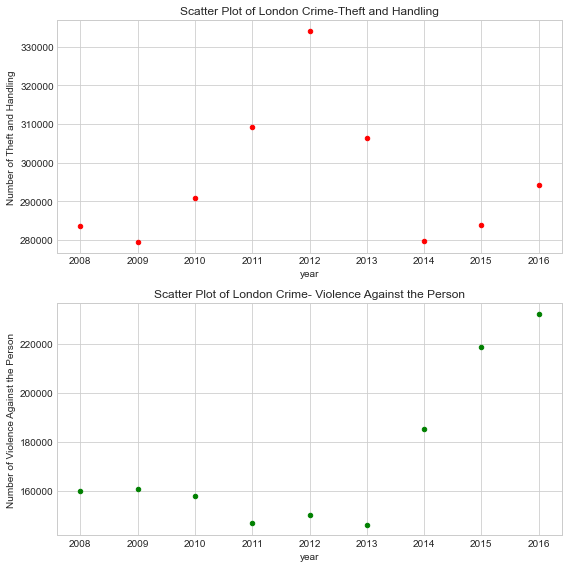

In [27]:
#membuat figure 
fig=plt.figure()
#membuat subplot 1 dan 2
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
#membuat scatter plot dari data df_theft
df_theft.plot(kind='scatter',figsize=(8,8),x='year',
              y='value', color='red',ax=ax1)
df_violence.plot(kind='scatter',figsize=(8,8),x='year',
                 y='value', color='green',ax=ax2)
#memberi judul, label sumbu x dan label sumbu y
ax1.set_title('Scatter Plot of London Crime-Theft and Handling')
ax1.set(ylabel='Number of Theft and Handling')
ax2.set_title('Scatter Plot of London Crime- Violence Against the Person')
ax2.set(ylabel='Number of Violence Against the Person')
fig.tight_layout()
plt.show()

dari scatterplot tersebut dapat dikatakan bahwa baik kasus theft and handling maupun violence against the person yang mendominasi kasus kejahatan di London selama tahun 2008-2016 tidak mengalami tren kenaikan dan penurunan. Kasus cenderung naik-turun setuiap tahunnya.

In [28]:
#mengambil data pada kolom total dan memasukannya ke list
values=list(df_lon_crime_byBorough.loc[:,'Total'])
#menjumlahkan total seluruh kasus kejahatan
total=df_lon_crime_byBorough.loc[:,'Total'].sum()
#menyimpang string kosong dalam variabel boroughwords
boroughWords=''
#menambahkan kata sesuai proporsinya dengan maksimal 500 kata
for idx,value in enumerate(values):
    times=int((value/total)*500)
    borough=df_lon_crime_byBorough.loc[idx,'borough']
    if len(borough.split(' '))==1:
        for i in range(times):
            boroughWords=boroughWords+borough+str(' ')

# Wordcloud 

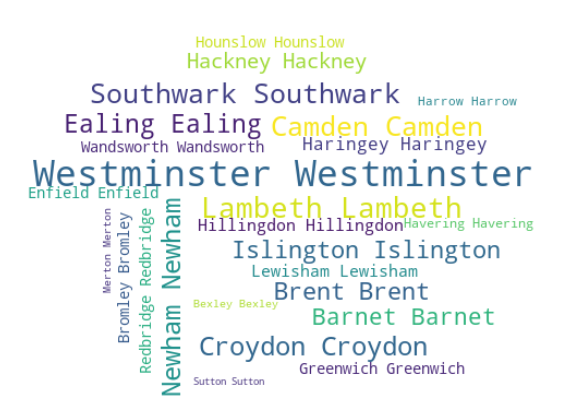

In [29]:
#mengimpor wordcloud
from wordcloud import WordCloud
#untuk mengubah image ke array
from PIL import Image
#menyimpan mask
mask=np.array(Image.open('mask-cloud.png'))
#membuat wordcloud
wordcloud=WordCloud(background_color='white',
                   mask=mask).generate(boroughWords)
#menampilkan cloud
fig=plt.figure()
fig.set_figheight(12)
fig.set_figwidth(10)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Dari wordcloud tersebut tampak bahwa Westminister paling mendominasi kemudian diikuti Lambeth, dan Southwark yang menunjukan kasus kejahatan didominasi pada wilayah tersebut

# London Map Crime

In [30]:
#mengimpor folium
import folium
#mengimpor plugins
from folium import plugins
#mengambil data posisi london
lon_geo=r'london_boroughs.geojson'
lon_map=folium.Map(location=[51.509865,-0.118092],zoom_start=10)

folium.Choropleth(
    geo_data=lon_geo,
    name="choropleth",
    data=df,
    columns=["borough", "value"],
    key_on='feature.properties.name',
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Crime rate in boroughs of London").add_to(lon_map)
lon_map



# Overview Analysis

Dari data-data yang didapatkan tersebut didapat informasi :
1. Selama tahun 2008-2016, Westminster Lambetth, Southwark, Camden, dan Newham menyumbangkan angka kasus tertinggi.
Westminster yang menjadi wilayah dengan kasus tertinggi dengan total kasus kejahatan yang tercatat sebesar 455.028 kejahatan, pada tahun 2013 Westminster mencatat angka kasus tertingginya yaitu hampir menyentuh angka 60 ribu kasus yang didominasi dengan kejahatan pencurian(62,9%) dengan bentuk pencurian yang beragam diantaranya pencurian dari kendaraan bermotor, pencurian kendaraan bermotor, perncurian di toko-toko, dan berbagai bentuk lainnya.
2. Setiap tahunnya terdapat setidaknya 20 ribu-30 ribu kasus kejahatan yang terjadi di kurang lebih 10 wilayah London pada periode 2008-2016
3. Dari tahun 2008-2016 kasus pencurian paling sering terjadi dengan persentase sebesar 41.3% kemudian disusul dengan kasus kekerasan terhadap seseorang dengan persentase 25%
4. kejahatan seksual di London menjadi yang paling jarang terjadi dengan persentase kurang dari 0.1%, kemudian disusul dengan kasus penipuan dan pemalsuan dengan persentase 0.1%
5. Angka kasus kejahatan di London dari tahun 2008-2016 cenderung stabil dan tidak mengalami kenaikan atau penurunan yang signifikan yaitu berkisar diangka 700.000 kasus. 

kesimpulan: Meskipun Kasus kejahatan di London selama tahun 2008-2016 tidak mengalami kenaikan, namun tidak juga mengalami penurunan yang signifikan sehingga upaya pemerintah untuk menurunkan angka kriminalitas perlu ditingkatkan untuk tahun-tahun selanjutnya. Upaya penanganan dapat difokuskan pada wilayah dengan angka kasus tertinggi terutama Westminster. Kemudian juga fokus pada upaya mengurangi kejahatan pencurian yang selama periode 2008-2016 paling banyak terjadi.